<a href="https://colab.research.google.com/github/piotrkm/dengue_data_repo/blob/main/DENGUE_project_grupa_01_klasyfikacja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv('https://raw.githubusercontent.com/piotrkm/dengue_data_repo/main/dengue_clean.csv', index_col='serial')
dataset.drop('Unnamed: 0', axis=1, inplace=True)

In [29]:
dataset

,tempmax,tempmin,temp,feelslikemax,dew,humidity,precip,precipcover,windspeed,sealevelpressure,cloudcover,visibility,solarradiation,uvindex,conditions,stations,cases
serial,,,,,,,,,,,,,,,,,
0,34.053151,24.478082,28.709863,39.757808,22.971233,73.508219,2.921726,4.360932,15.678356,1007.911781,50.747945,3.789863,208.097808,7.232877,2.558904,1.197260,4925.0
1,34.086179,25.694309,29.464228,41.338211,23.484553,72.066667,3.783415,2.676748,14.574797,1003.533333,48.313821,2.884553,222.926016,7.504065,1.658537,0.991870,5077.0
2,34.573984,25.417886,29.526829,40.464228,22.580488,69.424390,3.065854,2.337805,14.978049,1005.731707,55.621138,4.242276,229.413008,7.829268,1.910569,1.170732,7579.0
3,33.020325,25.080488,28.727642,37.878049,21.752033,69.297561,6.025203,2.676667,16.504878,1003.359350,50.208130,2.991057,225.421951,7.593496,1.300813,0.146341,13706.0
4,30.660976,24.230894,26.774797,36.586992,24.214634,86.652033,23.336585,15.616992,19.546341,1009.995935,45.542276,3.886992,176.598374,6.186992,0.967480,3.951220,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,32.300000,24.400000,28.500000,35.900000,23.300000,75.000000,0.000000,0.000000,17.100000,1008.900000,50.400000,3.100000,252.500000,9.000000,1.000000,1.000000,6729.0
598,32.700000,26.400000,29.300000,36.300000,22.600000,68.500000,0.000000,0.000000,16.600000,1010.400000,50.500000,3.100000,242.700000,8.000000,1.000000,1.000000,10541.0
599,33.000000,26.300000,29.800000,40.500000,23.900000,71.100000,0.000000,0.000000,19.000000,1010.800000,30.500000,3.100000,195.300000,8.000000,1.000000,1.000000,6396.0


# Klasyfikacja

Z powodu broku jednoznacznej kolumny z danymi zawierajacymi dane kategoryczne, konieczne bedzie jej utworzenie na podstawie wartosci zwiazanych z iloscia zachorowan **cases**

In [30]:
dataset.cases.describe()

,cases
count,592.000000
mean,8521.331081
std,6814.362803
min,52.000000
25%,2992.250000
50%,7526.500000
75%,12708.250000
max,24983.000000


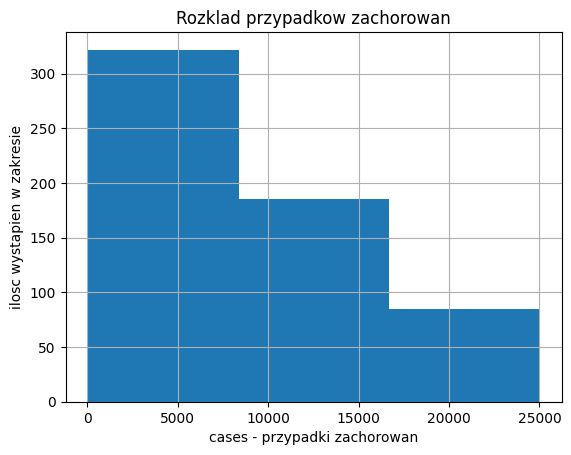

In [59]:
class_division = plt.hist(dataset.cases, bins=3)
plt.xlabel('cases - przypadki zachorowan')
plt.ylabel('ilosc wystapien w zakresie')
plt.title('Rozklad przypadkow zachorowan')
plt.grid()
plt.show()

In [32]:
class_division

(array([322., 185.,  85.]),
 array([   52.        ,  8362.33333333, 16672.66666667, 24983.        ]),
 <BarContainer object of 3 artists>)

In [33]:
threshold_1 = class_division[1][1].astype(int)
threshold_2 = class_division[1][2].astype(int)
threshold_3 = class_division[1][3].astype(int)

In [34]:
print(threshold_1, threshold_2, threshold_3)

8362 16672 24983


In [35]:
dataset['classes'] = dataset.cases.apply(lambda x: 1 if x < threshold_1 else (2 if x < threshold_2 else 3))

In [36]:
dataset[dataset['classes'] == 1]['classes'].describe()

,classes
count,322.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [37]:
dataset[dataset['classes'] == 2]['classes'].describe()

,classes
count,185.0
mean,2.0
std,0.0
min,2.0
25%,2.0
50%,2.0
75%,2.0
max,2.0


In [38]:
dataset[dataset['classes'] == 3]['classes'].describe()

,classes
count,85.0
mean,3.0
std,0.0
min,3.0
25%,3.0
50%,3.0
75%,3.0
max,3.0


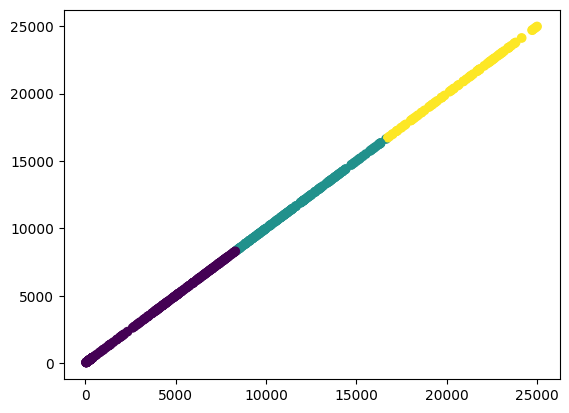

In [39]:
plt.scatter(dataset.cases, dataset.cases, c=dataset['classes'])

zegnamy sie z kolumna `cases` - jest to zmienna niezalezna i na jej podstawie wygenerowana jest kolumna `class`

In [40]:
from sklearn.model_selection import train_test_split
X = dataset.drop(['cases', 'classes'], axis=1)
y = dataset['classes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
#scaler = MinMaxScaler()

scaler.fit(X)

X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [42]:
X_train.shape, X_test.shape

((473, 16), (119, 16))

In [43]:
y_train.value_counts()

,count
classes,
1,255
2,147
3,71


In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [45]:
model_RF = RandomForestClassifier(n_estimators=105)

In [46]:
model_RF.fit(X_train, y_train)

RandomForestClassifier(n_estimators=105)

In [47]:
confusion_matrix(y_test, model_RF.predict(X_test))

array([[53, 11,  3],
       [17, 17,  4],
       [ 6,  4,  4]])

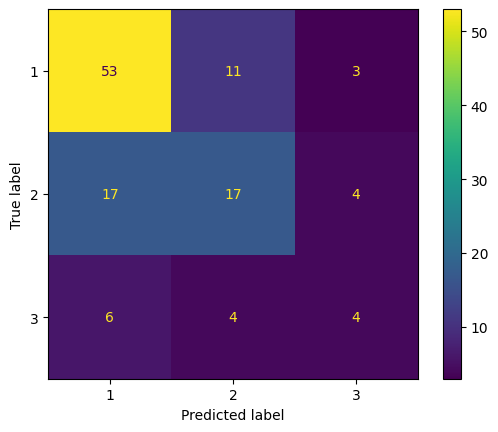

In [48]:
ConfusionMatrixDisplay.from_estimator(model_RF, X_test, y_test)
plt.show()

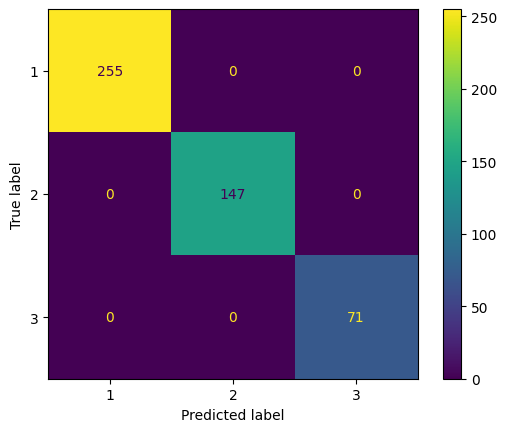

In [49]:
ConfusionMatrixDisplay.from_estimator(model_RF, X_train, y_train)
plt.show()

In [50]:
model_RF.score(X_test, y_test)

0.6218487394957983

In [51]:
model_LR = LogisticRegression(max_iter=5000)
model_LR.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [52]:
model_LR.score(X_test, y_test)

0.5714285714285714

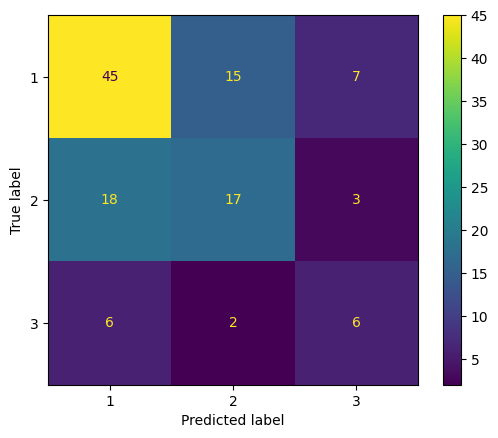

In [53]:
ConfusionMatrixDisplay.from_estimator(model_LR, X_test, y_test)
plt.show()

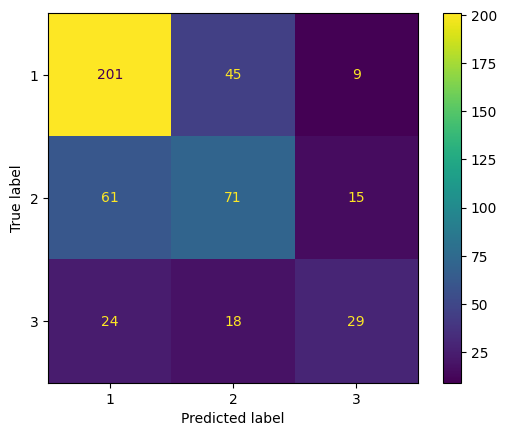

In [54]:
ConfusionMatrixDisplay.from_estimator(model_LR, X_train, y_train)
plt.show()